In [1]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
# Is gpu available?
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    
print(device)

cuda:0


In [4]:
# getting dataset ready...
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

import os
root_dir = "data/"
batch_size=16

try:
    os.mkdir(root_dir)
except FileExistsError:
    print("Path already exist")

# Transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,0,0), (1,1,1))]) #mean=0, stddev=1

# Loading data
train_data = MNIST(root=root_dir, train=True, download=True, transform=transform)
test_data = MNIST(root=root_dir, train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4)

classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print("Train samples:", len(train_data))
print("Test samples:", len(test_data))

print("Image shape:", iter(train_loader).next()[0].shape)

Processing...
Done!
Train samples: 60000
Test samples: 10000
Image shape: torch.Size([16, 1, 28, 28])


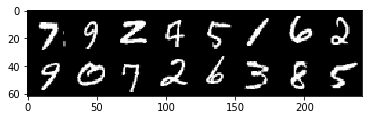

['7', '9', '2', '4', '5', '1', '6', '2', '9', '0', '7', '2', '6', '3', '8', '5']


In [6]:
# showing samples...
def get_random_sample():
    data_iter = iter(train_loader)
    for i in range(np.random.randint(100)):
        next(data_iter)
    return next(data_iter)

def show_images(images, mean, stddev):
    # de-normalizing images
    images = images*stddev + mean
    img = images.numpy()
    # making numpy compatible image
    img = np.transpose(img, (1,2,0))
    plt.imshow(img)
    plt.show()

images, lables = get_random_sample()
show_images(torchvision.utils.make_grid(images), mean=0, stddev=1)
print(list(classes[i] for i in lables))